# Logistic Regression

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qbstyles import mpl_style
import pandas as pd

## Background

### Linear Combinator

Let us consider a linear combinator $z$. It can be defined as $$z = b + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n}$$ Here, $z$ is a vector in $\real^m$, $b$ is the intercept term, and $w_{0}...w_{n}$ are weights (coefficients) to the vectors $x_{1}...x_{n}$. 

$z$ can also be represented using matrices. Let us represent our set of features $x$ as a $m\times n$ matrix, and our weights as a $n \times 1$ matrix.
$$\begin{bmatrix} z_1 \\ z_2 \\ \vdots  \\ z_m \end{bmatrix} = \begin{bmatrix}x^1_1 & x^1_2 & \ldots & x^1_n\\x^2_1 & x^2_2 & \ldots & x^2_n\\\vdots & \vdots & \ddots & \vdots\\x^m_1 & x^m_2 & \ldots & x^m_n\end{bmatrix} \cdot \begin{bmatrix} w_1 \\ w_2 \\ \vdots  \\ w_n \end{bmatrix} + b$$ 
Note, the dot product of an $m \times n$ matrix and an $n \times 1$ matrix is a $m \times 1$ matrix. 


### Features
It should be noted that features are commonly expressed as $x$ with the output/classification/result as $y$. With reference to the above linear combinator expressed in the form of a dot product, each column is essentially 1 feature to be used in this model.

## Hypothesis Function

### Probability
Let us define our hypothesis function $f_{w,b}(x)$ for a logistic regressor. Consider the probability of a binary classification with an output between 0 and 1, the hypothesis function can be represented as the probability of $y=1$ given an input $x^i$. More formally, we can define it as $$f_{w,b}(x) = P(y=1 | x \space ;\space θ) \text{ where } 0 < f_{w,b}(x) < 1$$ 


### Sigmoid Function
A logistic regression model is represented as a sigmoid function. A sigmoid function is the most common function used in machine learning to output a value between 0 and 1. We define the sigmoid function as $$g(z) = \frac{1}{1+e^{-z}}$$

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

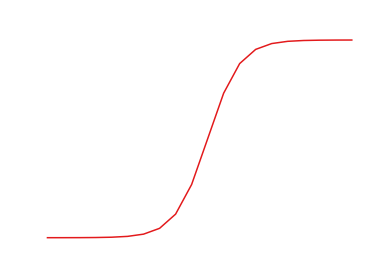

In [33]:
# Graphically, the sigmoid function looks like so:
a = np.arange(-10.0, 10.0)
b = sigmoid(a)
plt.plot(a,b)

## Config LaTex text rendering in legend
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)

## Config the graph
plt.title('Sigmoid Function')
plt.grid(True)
#plt.figure(figsize=(13,7))

mpl_style(True)
plt.show()

### Formal Definition
Let us finally define our hypothesis function formally. In logistic regression, the hypothesis function is defined as $$f_{w,b}(x) = g(\theta \cdot x + b)$$ where function $g$ is the sigmoid function, $\theta$ is the weight, $x$ is the feature set and $b$ is the intercept term.

## Cost Function


### Loss Function
A loss function is needed to compare how correct or incorrect our predictions $z$ are given $\theta$, as compared to the actual classification. Formally, we can define the loss function as follows: $$\text{Loss}(f_{w,b}(x^{(i)}),y^{(i)}) = \left\{ \begin{aligned} -log(f_{w,b}(x^{(i)}) \quad \quad \text{if } y^{(i)} = 1\\ -log(1-f_{w,b}(x^{(i)}) \quad \quad \text{if } y^{(i)} = 0 \end{aligned} \right.$$ Given the range of function $f_{w,b}(x^{(i)})$ being $0 \le f_{w,b}(x^{(i)}) \le 1$, the domain of $\text{Loss}(f_{w,b}(x^{(i)}),y^{(i)})$ is $[0,1]$


### Penalise/Incetivise
A loss function can be used to "penalise" our logistic regression by means of how inaccurate the prediction is. For the case of $y=1$, should the prediction be accurate, our loss function is 0, implying that there is 0 penalities to a correct prediction. However, should the prediction be inaccurate, the loss function would approach infinity. In this way, a wrong prediction is penalised with a higher loss. Vice versa for the case of $y=0$. Note, here $y$ denotes the correct classification. 

C:\Users\Sean\AppData\Local\Temp\ipykernel_8512\1974465336.py:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(nums, np.multiply(1, -np.log(nums)), c='r', label='If y = 1')


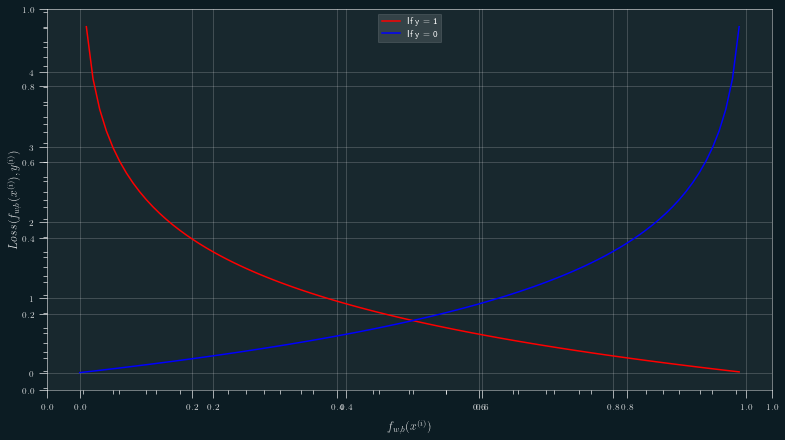

In [34]:
# Graphically, the Cost function looks like so:
nums = np.arange(0, 1, step=.01)
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(nums, np.multiply(1, -np.log(nums)), c='r', label='If y = 1')
ax.plot(nums, np.multiply(1, -np.log(1-nums)), c='b', label='If y = 0')
ax.set_xlabel('$f_{w,b}(x^{(i)})$')
ax.set_ylabel('$Loss(f_{w,b}(x^{(i)}), y^{(i)})$')
ax.legend(loc='upper center')
mpl_style(True)
plt.show()

When $y^{(i)}=0$,
$$\text{as } f_{w,b}(x^{(i)}) \to1, \quad \text{Loss}(f_{w,b}(x^{(i)}), y^{(i)}) \to \infty$$
$$\text{as } f_{w,b}(x^{(i)}) \to0, \quad \text{Loss}(f_{w,b}(x^{(i)}), y^{(i)}) \to 0$$


When $y^{(i)}=1$,
$$\text{as } f_{w,b}(x^{(i)}) \to1, \quad \text{Loss}(f_{w,b}(x^{(i)}), y^{(i)}) \to 0$$
$$\text{as } f_{w,b}(x^{(i)}) \to0, \quad \text{Loss}(f_{w,b}(x^{(i)}), y^{(i)}) \to \infty$$

### Simplification
Given that $y^{(i)}$ is either 0 or 1, we can rewrite the loss function as follows, $$\text{Loss}(f_{w,b}(x^{(i)}), y^{(i)}) = -y^{(i)}\space log(f_{w,b}(x^{(i)})) \space - \space (1-y^{(i)})\space log(1-f_{w,b}(x^{(i)}))$$ Here, $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label.

### Cost Function
A cost function $J(w,b)$ is the average loss of our entire dataset. It is defined as follows, $$J(w,b) = \frac{1}{m}\sum_{i=1}^{m}\text{Loss}(f_{w,b}(x^{(i)}), y^{(i)})$$ where $m$ is the number of data in our dataset

In [35]:
def cost(f_wb,y):
    epsilon = 1e-5 #deal with log of 0
    return (-y * np.log(f_wb+ epsilon) - (1 - y) * np.log(1 - f_wb + epsilon)).mean()

### Other misc pesky stuff
#### Over in Linear Regression Land...
In learn regression land, our cost function makes use of a mean squared error (MSE) function. By observation, an MSE is really close to our current cost function and this is not a coincidence. Formally, our cost function is slightly different from that of a linear regression due to our new hypothesis function. While our hypothesis function can be defined as a linear combinator, it is also defined as a sigmoid function. With a sigmoid function, we would obtain a non-convex function with no easy way to find a global minimum. This would affect the results of our gradient descent, making our model unoptimised and potentially restricted to a local minimum point. Thus why our new cost function looks similar to that of a linear regression cost function but is altered to that of a Log Loss function. 

https://www.internalpointers.com/post/linear-regression-one-variable <br>
https://www.internalpointers.com/post/cost-function-logistic-regression

### Regularise

#### What?
(To quote google because im really lazy), Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Imagine that you assign a unique id to each example, and map each id to its own feature. If you don't specify a regularization function, the model will become completely overfit. That's because the model would try to drive loss to zero on all examples and never get there, driving the weights for each indicator feature to +infinity or -infinity. This can happen in high dimensional data with feature crosses, when there’s a huge mass of rare crosses that happen only on one example each. <br>
Src: https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training <br>

So what does this mean? Well it means we have overfit our model. Overfitting refers to our model being skewed towards training data but not the actual real-world data, and its something we want to avoid as much as possible. In logistic regression, we have 3 ways to handle that (i.e dampen model complexity): 
* L2 Regularisation
* L1 Regularisation
* Early stopping, that is, limitting the number of training steps or the learning rate

#### How now?

If we can limit the flexibility of the model, this might help with performance on the unseen, new data sets. Generally, any modification of the learning method to improve performance on the unseen datasets is called regularization. We need regularization to introduce bias to the model and to decrease the variance. This can be achieved by modifying the loss function with a penalty term which effectively shrinks the estimates of the coefficients. Therefore these types of methods within the framework of regression are also called "shrinkage" methods or "penalized regression" methods.

One way to ensure shrinkage is to add the penalty term, $\lambda\sum{\theta_j}^2$, to the loss function. This penalty term is also known as the L2 norm or L2 penalty. It is calculated as the square root of the sum of the squared vector values. This term will help shrink the coefficients in the regression towards zero. The new loss function is as follows, where $j$ is the number of parameters/coefficients in the model and $L_{log}$ is the log loss function.

$$
L_{log}+\lambda\sum_{j=1}^p{\theta_j}^2
$$

This penalized loss function is called "ridge regression" (Hoerl and Kennard 1970). When we add the penalty, the only way the optimization procedure keeps the overall loss function minimum is to assign smaller values to the coefficients. The $\lambda$ parameter controls how much emphasis is given to the penalty term. The higher the $\lambda$ value, the more coefficients in the regression will be pushed towards zero. However, they will never be exactly zero. This is not desirable if we want the model to select important variables. A small modification to the penalty is to use the absolute values of $B_j$ instead of squared values. This penalty is called the "L1 norm" or "L1 penalty". The regression method that uses the L1 penalty is known as "Lasso regression" (Tibshirani 1996).

$$
L_{log}+\lambda\sum_{j=1}^p{|\theta_j}|
$$

However, the L1 penalty tends to pick one variable at random when predictor variables are correlated. In this case, it looks like one of the variables is not important although it might still have predictive power. The Ridge regression on the other hand shrinks coefficients of correlated variables towards each other, keeping all of them. It has been shown that both Lasso and Ridge regression have their drawbacks and advantages (Friedman, Hastie, and Tibshirani 2010).. 




<br> I SHAMELESSLY COPIED THIS FROM: https://compgenomr.github.io/book/logistic-regression-and-regularization.html
<br> Source to cite: https://icml.cc/Conferences/2004/proceedings/papers/354.pdf

#### Formal Definition of Cost with L1 Regularisation

$$J(w,b) = \frac{1}{m}\sum_{i=1}^{m}\text{Loss}(f_{w,b}(x^{(i)}), y^{(i)}) +\frac{\lambda}{m}\sum_{j=1}^p{\theta_j}^2 $$ 
Note, the intercept $b$ is not regularised.

#### Formal Definition of Cost with L2 Regularisation

$$J(w,b) = \frac{1}{m}\sum_{i=1}^{m}\text{Loss}(f_{w,b}(x^{(i)}), y^{(i)}) +\frac{\lambda}{m}\sum_{j=1}^p{|\theta_j}|$$ 
Note, the intercept $b$ is not regularised.

In [36]:
# Lamda values were copied from https://python.plainenglish.io/ridge-lasso-elasticnet-regressions-from-scratch-32bf9f1a03be
def l1RegularisationCost(f_wb,y,w,lamda=0.1):
    logLoss = cost(f_wb,y)
    l1Lasso = (lamda * np.sum(np.abs(w))) / y.size
    return logLoss + l1Lasso

def l2RegularisationCost(f_wb,y,w,lamda=0.1):
    logLoss = cost(f_wb,y)
    l2Ridge = (lamda * np.sum(np.square(w))) / y.size
    return logLoss + l2Ridge

## Batch Gradient Descent (Optimisation Function)


### Algorithm
A Gradient Descent function allows us to optimise our weights such that we can minimise our cost, where $J(w,b) \to 0$ For our model, we will make use of the Batch Gradient Descent Algorithm, which iteratively updates our weights until we reach the global minimum of $J(w,b)$, also known as convergence. The algorithm is as follows, 

\begin{align*}
& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \;  \newline & \rbrace
\end{align*} 
where, intercept $b$ and weight $w_j$ are updated simultaneously.

### Calculating Partial Derivatives

#### Partial Derivative w.r.t $b$
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})
$$

$$
b := b -\alpha\frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)} )
$$

#### Normal


\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j} &= \frac{\partial}{\partial w_j} \left( -\frac{1}{m} \left[\sum_{i=1}^m y^{(i)} \space log(f_{w,b}(x^{(i)})) + (1-y^{(i)}) \space log(1-f_{w,b}(x^{(i)}))\right] \right) \\
& = \frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)}
\end{align*}


$$
w_j := w_j -\alpha\frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)} )x_j^{(i)}
$$

In [37]:
#Note, X, weights, y, f_wb are all numpy arrays
def gradientDescent(X, y, alpha=0.001, iterations=100000):   
    # weights initialization
    weights = np.zeros(X.shape[1])
    beta = 0
    descent = dict()
        
    for i in range(iterations):
        #calculate new weights and beta
        z = np.dot(X, weights) + beta
        f_wb = sigmoid(z)
        #calculate gradients
        '''
        - X.T is the transpose of X (out features). 
        - Here, transpose is used to change the shape of X from (Sample, Features) to (Features, Sample) so that we can multiply it with the error vector.
        - f_wb - y is the difference between the predicted and actual values
        - Dot product is used to mulyiply the two matrices (reference explanation)

        - w.r.t to explanation, y.size is m (number of samples)
        - Summation of gradient for the jth feature is the same as the dot product of the jth column of X and the error vector
        - We are batch updating the weights, so we are using the entire dataset to calculate the gradient
        '''
        gradient = np.dot(X.T, (f_wb - y)) / y.size
        weights -= alpha * gradient
        '''
        - Beta is calculated similar to the gradient, except we do not multiply it by X (i.e its transpore)
        - Sum is used here to sum up all the values in the error vector since there is only 1 beta value
        '''
        beta -= alpha * (np.sum(f_wb - y) / y.size)

        #calculate cost of new weight
        z = np.dot(X,weights) + beta
        f_wb = sigmoid(z)
        loss = cost(f_wb, y)
                
        if i % 10000 == 0:
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {weights} \t', f'beta: {beta}')
    return weights, descent, beta

### Algorithimic Analysis




#### Matrix Dot Product
Consider the time complexity of a matrix dot product for 2 N x N matrices. The most common algorithm is the Schoolbook Algorithm. In psuedocode, 
```python
input A and B, both n by n matrices
initialise C to be an n by n matrix of all zeros
for i from 1 to n:
    for j from 1 to n:
        for k from 1 to n:
            C[i][j] = C[i][j] + A[i][k] * B[k][j]
output C (as A*B)
```
As such, the time complexity of a matrix dot product is $O(n^3)$

#### Matrix-Vector Dot Product
Consider the time complexity of a dot product of an N x M matrix and a Vector (1 Dimension Array). In psuedocode, we can compute this as such:
```python
input A, an n by m matrix
input B, an array of size n
initialise C to be an n by 1 matrix of all zeros
for i from 1 to n:
    for j from 1 to m:
        C[i] = C[i][j] + A[i][j] * B[i]
output C
```
(Some good source: https://mathinsight.org/matrix_vector_multiplication)

#### Batch Gradient Descent

##### Dot Product Time Complexity
According to numpy documentation, a call to `np.dot()` with an NxM matrix and a Vector (1 dimension array) will be internally calculated as a "Sum Product", that is a Matrix-Vector Dot Product.
In our algorithm, we are multiplying a matrix of size F x S with a Vector of feature weights (an array of size f), the pseudocode to compute this is as follows:
```python
input A, an F by S matrix
input B, an array of size F
initialise C to be an n by 1 matrix of all zeros
for i from 1 to F:
    for j from 1 to D:
        C[i] = C[i] + A[i][j] * B[j]
output C
```
As such, our time complexity of the dot product of our F x S matrix and Vector of feature weights is $O(FS)$

Numpy Docs: https://numpy.org/doc/stable/reference/generated/numpy.dot.html <br>
`If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.` <br>
Numpy "Sum Product" : https://stackoverflow.com/questions/52764331/what-is-the-meaning-of-sum-product-as-mentioned-in-numpy-documentation

##### Overall Time Complexity
With a for loop of N iterations, our overall time complexity is given as $O(nFS)$ where 
* N - number of iterations
* F - Number of features
* S - Number of samples in our dataset

(Backup/Confirmation): https://stackoverflow.com/questions/54238493/what-is-the-search-prediction-time-complexity-of-logistic-regression

### Calculating Partial Derivatives (Regularisation)

#### Partial Derivative w.r.t $b$
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})
$$

$$
b := b -\alpha\frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)} )
$$

#### L1 Regularisation


\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j} &= \frac{\partial}{\partial w_j} \left( -\frac{1}{m} \left[\sum_{i=1}^m y^{(i)} \space log(f_{w,b}(x^{(i)})) + (1-y^{(i)}) \space log(1-f_{w,b}(x^{(i)}))\right] \right) +  
\frac{\partial}{\partial w_j} \left(\frac{\lambda}{m}\sum_{j=1}^p {|w_j}| \right)\\ 
& = \frac{1}{m} \left( \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)} + \lambda\frac{w_j}{|w_j|} \right)
\end{align*}


$$
w_j := w_j -\alpha\frac{1}{m} \left( \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)} + \lambda\frac{w_j}{|w_j|} \right)
$$

#### L2 Regularisation


\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j} &= \frac{\partial}{\partial w_j} \left( -\frac{1}{m} \left[\sum_{i=1}^m y^{(i)} \space log(f_{w,b}(x^{(i)})) + (1-y^{(i)}) \space log(1-f_{w,b}(x^{(i)}))\right] \right) +  
\frac{\partial}{\partial w_j} \left(\frac{\lambda}{m}\sum_{j=1}^p{w_j}^2 \right) \\
& = \frac{1}{m} \left( \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)} + 2\lambda\theta_j \right)
\end{align*}


$$
w_j := w_j -\alpha\frac{1}{m} \left( \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)} + 2\lambda\theta_j \right)
$$

In [38]:
def gradientDescentL1(X, y, alpha=0.001, lamda=0.1, iterations=100000):   
    # weights initialization
    weights = np.zeros(X.shape[1])
    beta = 0
    descent = dict()
        
    for i in range(iterations):
        #calculate new theta
        z = np.dot(X, weights) + beta
        f_wb = sigmoid(z)
        weights -= alpha * ((1/y.size) * (np.dot(X.T, (f_wb - y)) + (lamda * np.sign(weights))))
        beta -= alpha * (np.sum(f_wb - y) / y.size)

        #calculate cost of new theta
        z = np.dot(X,weights) + beta
        f_wb = sigmoid(z)
        loss = l1RegularisationCost(f_wb, y,weights,lamda)
                
        if i % 10000 == 0:
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {weights} \t', f'beta: {beta}')
    return weights, descent, beta

def gradientDescentL2(X, y, alpha=0.001, lamda=0.1, iterations=100000):   
    # weights initialization
    weights = np.zeros(X.shape[1])
    beta = 0
    descent = dict()
        
    for i in range(iterations):
        #calculate new theta
        z = np.dot(X, weights) + beta
        f_wb = sigmoid(z)
        weights -= alpha * ((1/y.size) * (np.dot(X.T, (f_wb - y)) + (lamda * 2 * weights)))
        beta -= alpha * (np.sum(f_wb - y) / y.size)

        #calculate cost of new theta
        z = np.dot(X,weights) + beta
        f_wb = sigmoid(z)
        loss = l2RegularisationCost(f_wb, y, weights, lamda)
                
        if i % 10000 == 0:
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {weights} \t', f'beta: {beta}')
    return weights, descent, beta

## Prediction Function

### Algorithm
The prediction function is simply the dot product of our feature matrix and weights vector, and our intercept $b$ added to it, passed through our sigmoid function. Note, $b$ is also sometimes called the bias. In code,
```python
def predict(X, weights, beta, threshold=0.5):
    preds = sigmoid(np.dot(X, weights) + beta)
    preds = [1 if i >= threshold else 0 for i in preds]
    return preds
```
Note, the use of a threshold is due to the sigmoid curve. Here, we set a threshold of 0.5. 

#### Algorithmic Analysis
Time Complexity:
- The prediction function is simply a dot product of a F x S matrix and Weight Vector (Array of size F). 
- With reference to the above explanation regarding the time complexity of a matrix-vector dot product, our time complexity is simply $O(FS)$

Space Complexity:
- Simply $O(d)$ where d is number of dimensions (features/attributes)

## Others

High learning rate can converge quickly, but risks overshooting the lowest point. Low learning rate allows for confident moves in the direction of the negative gradient. However, it time-consuming so it will take us a lot of time to get to converge. It is best described the following picture. ![image](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)



Assumptions/Limitations of Logistic Regression:
https://github.com/kennethleungty/Logistic-Regression-Assumptions


#### Some notes
- Most likely will use regularisation together with logisitic regression as part of the evaluation (either L1 or L2) 
- No, we are not grid searching hyperparameters and learning rate. This is too much effort!
- Can talk about solving the optimisation problem (coordinate descent, gradient descent, SGD etc)
- https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
- Beta =  $b$ = bias = intercept. Sorri my notation shit

#### Other References
https://github.com/collinprather/Logistic-Regression-from-scratch <br>
https://medium.com/analytics-vidhya/basics-and-beyond-logistic-regression-34549d2ee800

